# Curso de Python para Analisis de Datos

## Clase 5


#### Indice:
        Pandas
            Series
            Data Frames
            .read_csv
            .head()
            .tail()
            .loc
            .iloc
            .dtypes()
            Missing Values
            .dropna()
            .groupby()
            .fillna()
            .rename()
            .astype()
            .unique()
            .value_counts()
            .reset_index()
            .corr()
        
        
        

## Modulo 2: Pandas-Conociendo un dataset

Una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como _"Analisis exploratorio de los datos"_. Es útil para saber que tipo de datos contiene el dataset, obtener estadistica descriptiva y detectar problemas como valores faltantes (o missing values). 

Pandas es una gran ayuda para manejar nuestros dataset. En la clase de hoy, veremos algunos conceptos basicos de pandas y como leer datasets.


<img src="pandas.series.png">

<img src="pandas.dataframe.png">

In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd

In [ ]:
serie = pd.Series(data = [1,2,3, 4, 6.7], 
          index=['primero', 'segundo' ,'tercero', 'cuarto', 'quinto'])

In [ ]:
type(serie)

In [ ]:
serie

In [ ]:
serie.columns

In [ ]:
df = pd.DataFrame(data = [1,2,3, 4, 6.7], 
          index=['primero', 'segundo' ,'tercero', 'cuarto', 'quinto'])

In [ ]:
df.index

In [ ]:
df.columns

Pandas nos facilita con varias funciones para leer archivos. Entre ellas podemos encontrar:

- `.read_csv()`: lee archivos `csv` como DataFrame
- `.read_json()`: lee archivos `json` como DataFrame
- `.read_excel()`: leer archivos `excel` como DataFrame

Para conocer más funciones que ayuden a leer archivos, consulta [acá](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

Nosotros vamos a usar [`.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 

Los archivos `csv` son un tipo de documento en formato abierto sencillo para representar datos en forma de tabla, en las que las columnas se separan por comas (o punto y coma) y las filas por saltos de línea. Es uno de los formatos más utilizados en Data Science.

La sintaxis para poder leer un archivo csv es: 
    
`df = pd.read_csv('nombredelarchivo.csv', delimiter=',')`

Aunque muchas veces se omite el `delimiter` si el archivo esta separado por comas.

Vamos a trabajar con el archivo `StudentsPerformance.csv` (Lo podes encontrar en la carpeta Clase2). Es usual descargar el archivo `csv` en la misma carpeta en la que trabajas con el jupyter notebook. De esta manera, no tendras que especificar el path a tu archivo.

1) Lee el archivo csv `StudentsPerformace` usando `pandas`. Guardalo en una variable llamada `students`.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
students = pd.read_csv("StudentsPerformance.csv")

In [4]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:ylabel='Frequency'>

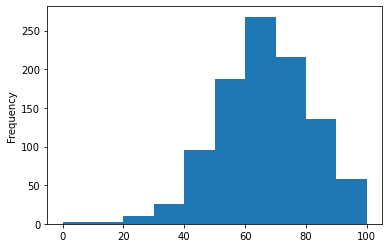

In [5]:
students["math score"].plot.hist()

In [6]:
students.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

2) ¿Que tipo de estructura de datos contiene la variable `students`? _Hint_: Usa `type`

In [8]:
type(students)

pandas.core.frame.DataFrame

3) ¿Cuantas filas y columnas tiene `students`? Para contestar esta pregunta, pandas tiene la funcion `.shape`. Su sintaxis es la siguiente: `df.shape` (`df` debe ser reemplazado por el nombre de tu `DataFrame`). 


De ahora en más cuando nos refiramos a un tipo de sintaxis donde debe colocarse `nombre_del_data_frame.funcion()`, la mencionaremos como `.funcion()`.

¿Que devuelve esta funcion? ¿Cual crees que corresponde a las filas y cual a las columnas?


**Numero de filas**: ____

**Numero de columnas**: ____

In [9]:
students.shape

(1000, 8)

3) ¿Cual es el nombre de las columnas contenidas en `students`? Para esto, pandas tiene el atributo `.columns`.

In [10]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

4) Inspecciona las primeras 10 filas de `students` usando la función `.head()`. Dentro de esta función podemos colocar un numero. Este numero nos dira cuantas filas queremos observar.

In [11]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


5) Ahora inspecciona las 10 ultimas usando `.tail()`. También podemos indicar el número de filas que queremos observar.

In [12]:
students.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


6) ¿Que tipos de datos contiene cada una de las columnas de `students`? Para esto, utiliza el atributo `.dtypes`.

In [13]:
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

7) ¿Como accedemos a una fila o a una columa de un DataFrame?

Una de las maneras de acceder a una columna es especificando el nombre de la misma. Por ejemplo, `df['nombre_columna']`.

- Accede a la columna `gender` de `students`.

In [ ]:
students['gender']

- Accede ahora a la columna `lunch`.

In [ ]:
students['lunch']

In [ ]:
students.lunch

Otra manera de acceder es usando dos funciones `.loc[]` y `.iloc[]`.

- `iloc[1:m, 1:n]`: Se usa para seleccionar filas basadas en su posición de 1 a m filas y de 1 a n columnas. 

In [ ]:
#seleccionar las dos primeras filas y 3 columnas
students.iloc[:2, :3]

In [ ]:
#o tambien se usa para las dos primeras filas y todas sus columnas
students.iloc[:2,]

In [ ]:
#Selecciona los datos entre la decima y vigesima fila.
students.iloc[10:21]

In [ ]:
#Selecciona las dos primeras columnas 
students.iloc[:, :2]

- `.loc[[nombre_fila], [nombre_columna]]`. Se usa para seleccionar filas o columnas basadas en su nombre 

In [ ]:
#Selecciona la fila por nombre 1, o sea con indice igual a 1
students.loc[1]

In [ ]:
#Corre el codigo y observa que devuelve
students.loc[[1,20,3,4,5],['gender','lunch']]

In [ ]:
#Selecciona las filas con indices 3, 10, 30, 43, 43 y columnas reading score y writing score
students.loc[[3, 10, 30, 43, 43], ['reading score', 'writing score']]

In [ ]:
df2 = pd.DataFrame(data = ['perro', 'gato', 'flor'], index = ['str1', 'str2', 'st32'], columns=['titulo'])

In [ ]:
df2

In [ ]:
df2.loc['str2']

In [ ]:
df2.iloc[1]

 A veces queremos seleccionar filas que cumplan con ciertas condiciones, donde el valor de una columna en esa fila sea igual, mayor o menor que un valor.

Para esto tenemos que usar una sintaxis especial. Vamos a construirla de a poco. Imaginemos que tenemos un DataFrame `df` con las columnas `col1`, `col2` y `col3`. Queremos seleccionar solo aquellas filas donde `col1` sea mayor a 10.

Para eso diremos que queremos

`df['col1'] > 10` (La columna col1 debe ser mayor a 10). 
Ahora si corremos este codigo, veremos que devuelve valores booleanos. O sea devolvera False para aquellos valores que sean menores o iguales a 10 y True para los que sean mayores a 10.

O sea que tenemos que agregar algo mas para poder seleccionar las columnas. Esta lista de valores booleanos se llama mascara booleana. 

¿Que significa? Que si yo le paso estos valores a pandas, pandas interpretara que debe conservar aquellos valores donde tiene True y descartar donde tiene False.

Por eso, para filtrar filas en base a estas condiciones escribimos:

**`df[df['col1] > 10]`**

Esto significa primero fijate en que filas de `df`, la columna `col1` es mayor a 10. Luego, selecciona solo aquellas filas donde esta condicion sea `True`.

In [ ]:
#Selecciona solo las filas donde math score sea mayor a 70
students[students['math score'] > 70]

In [ ]:
#Selecciona solo las filas donde reading score sea menor a 60
students[students['reading score'] < 60]

In [ ]:
#Selecciona solo las filas donde gender sea igual a female
students[students['gender'] == 'female']

In [ ]:
#Selecciona solo aquellas filas donde lunch sea distinto a standard
students[students['lunch']!='standard']

In [ ]:
#Muestra los valores de writing score para aquellos estudiantes que tengan reading score mayor a math score
students[students['reading score'] > students['math score']]['writing score']

In [ ]:
#Selecciona aquellos estudiantes que posean reading and writing score mayor a 70
students[(students['reading score']>70)&(students['writing score']>70)]

### Missing Values o Valores faltantes

Los valores faltantes son un problema muy grande a la hora de visualizar y limpiar datos así como también a la hora de entrenar un modelo. Uno de los pasos obligados de cualquier exploración de datos es evaluar la presencia de estos valores.

Como manejar estos datos faltantes es un gran desafio. La mayoría de las veces no queremos eliminar esos valores porque significaría perder información valiosa en otros features. 

Los valores faltantes estan codificados normalemente como `NaN`. Esto no es un string, sino que es un valor especial de `NumPy` que es tratado como un flotante.

Otra forma de encontrar un dato faltante es de la forma `None` (objeto de Python que representa ausencia de dato)

Para chequear si tenemos valores faltantes podemos usar la función `.isnull()`. Esto nos devuelve una nueva DataFrame en la cual tendremos el valor False si no es faltante y True si ese valor es faltante.

In [ ]:
#Usa .isnull() para ver que ocurre
students.isnull()

In [ ]:
#Prueba usar .isnull().sum() sobre tu dataframe para ver que devuelve
students.isnull().sum()

¿Hay valores faltantes en alguna de las columnas de `students`? Si

Si la cantidad de valores faltantes es poca, podemos entonces deshacernos de ellas. Para esto pandas ofrece la función [`.dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Esta función hara que se eliminen las filas donde hay valores faltantes. Si no le pasamos ningun parametro extra, eliminara todas las filas con valores faltantes. Sin embargo, podes chequear en la documentación como eliminar solo algunas de las filas.

In [ ]:
#Elimina todas las filas que tengan valores faltantes. No te olvides de poner inplace=True dentro de la función.
students.dropna(inplace=True)

Una manera de ver facilmente algunos detalles estadisticos de cada columna de un DataFrame es usando la fución `.describe()`.

In [ ]:
#Usa la funcion .describe() sobre students y describe que informacion estadistica proporciona
students.describe()

Tambien es posible visualizar, por ejemplo, el promedio de una columna. Para esto pandas usa la función de numpy, pero provee la misma sintaxis que las demás funciones. Por ejemplo, si queremos calcular el promedio de la columna `col1` del DataFrame `df` usamos `df['col1'].mean()`.

In [ ]:
#Calcula el promedio de la columna math score de students
students['math score'].mean()

También podemos usar funciones como `.min()`, `.max()`, `.median()`, `.std()`.

In [ ]:
#Calcula el minimo y maximo valor, la mediana y el desvio estandard en la columna math score de students
students['math score'].min()

In [ ]:
students['math score'].max()

In [ ]:
students['math score'].median()

In [ ]:
students['math score'].std()

[Investiga](https://pandas.pydata.org/pandas-docs/stable/index.html) y trata de aplicar las siguientes funciones de `pandas`:

- `.index`

In [ ]:
#Veo el indice de las columnas
students.index

In [ ]:
#Asigno un nuevo nombre para los indices de las columnas
#Algo que no comentamos es que las columnas tambien se pueden acceder a traves
#de usar dataframe.nombredelacolumna. Esta nomenclatura en algunos casos hace que 
#sea mas rapida la escritura del codigo pero tambien tenemos que tener cuidado 
#porque es incompatible con los nombres de las columnas que contengan espacios
students.index = students.gender

In [ ]:
students.head()

- `.drop()`

In [ ]:
#elimina una columna (axis=1) o  una fila (axis=0) que cumpla con la condicion que le ponga
students.drop('gender', axis=1, inplace=True)

In [ ]:
students.head()

- `.groupby()`

In [ ]:
#agrega las distintas filas. sirve para obtener medidas agrupadas por alguna caracteristica
students.groupby('lunch')['math score'].mean()

- `.fillna()`

In [ ]:
#si hay valores nullos llena esos valores con el valor que proveamos
students['lunch'].fillna('standard', inplace=True)

- `.rename()`

In [ ]:
#sirve para renombrar columnas, indices, etc
students.rename(columns={'lunch': 'meal'}, inplace=True)

In [ ]:
students.head()

- `.astype()`

In [ ]:
#convierte las columnas entre tipo de datos
students['math score'].astype(str)

- `.unique()`

In [ ]:
#Obtiene los valores unicos de una variable categorica
students['meal'].unique()

- `.value_counts()`

In [ ]:
#cuenta la cantidad de veces que cada nivel de una variable categorica aparece
students['race/ethnicity'].value_counts()

- `.count()`

In [ ]:
#cuenta los valores no nulos.
students.count()

- `.reset_index()`

In [ ]:
#resetea los indices de una df
students.reset_index(drop=False)

## Ejercicios
Hacer una una función que importe el archivo  StudentsPerformance.csv y realizar:

- guardar el en una variable el dataframe (dt)
- guardar en la variable shape_date el shape
- guardar en la variable columns_dt las columnas
- guardar en la variable tail_dt los ultimos diez objetos
- guardar en la variable null_sum_df todos los objetos que son de tipo null
- Selecciona aquellos estudiantes que posean reading and writing score mayor a 85 y guardarlo en la variable students_dt
- guardar en la variable stads_df la estadistica de df usando df y retornala.

In [ ]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd

In [ ]:

df= pd.read_csv('../En Limpio/StudentsPerformance.csv', delimiter=',')
shape_df = df.shape
columns_df = df.columns
tail_df = df.tail(10)
null_sum_df = df.isnull().sum()
students_df = df[(df['writing score'] > 85) & (df['reading score'] > 85)]
stads_df = df.describe()


print(shape_df, columns_df, tail_df, null_sum_df, students_df, stads_df)




In [ ]:
students.corr()